# Using opencv - computer vision operations

We will explore several computer vision operations which can be performed by opencv.

In [1]:
# make sure opencv is installed
! pip install opencv-python --quiet
! pip install matplotlib --quiet
! pip install numpy --quiet


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# import the necessary modules
import cv2 as cv
from matplotlib import pyplot as plt 
import numpy as np

# define path constants
INPUT_DIR = "./images/input/"
OUTPUT_DIR = "./images/output/"
INPUT_IMAGE = "traffic.png"

In [3]:
# read the image data, forcing color conversion
original_image_data = cv.imread(
    filename = INPUT_DIR + "/" + INPUT_IMAGE, # specification of input file
    flags = cv.IMREAD_COLOR # the image will be read forcing color conversion
)

# triple resizing for up-scaled image version
input_image_data = cv.resize(
    src = original_image_data, # use original image
    dsize = (original_image_data.shape[1] * 3, original_image_data.shape[0] * 3), # scale the image at triple size
    interpolation = cv.INTER_LANCZOS4 # using a specific interpolation techniques
)


In [4]:
# define a function for displaying images
def display_image(image_data, conversion = None, cmap = None):
    
    # set the image size
    fig = plt.figure(frameon= False)
    fig.set_size_inches(image_data.shape[1] / 100,  image_data.shape[0] / 100)
    
    # adjust image data in order to perform data conversion 
    image_data_adjusted = image_data
    if conversion:
        image_data_adjusted = cv.cvtColor(image_data, conversion)

    # display image data
    plt.imshow(
        X = image_data_adjusted,
        cmap = cmap
    )
    
    # hide grid ticks
    plt.xticks([])
    plt.yticks([])
    
    # show the image plot
    plt.show()
    
    return

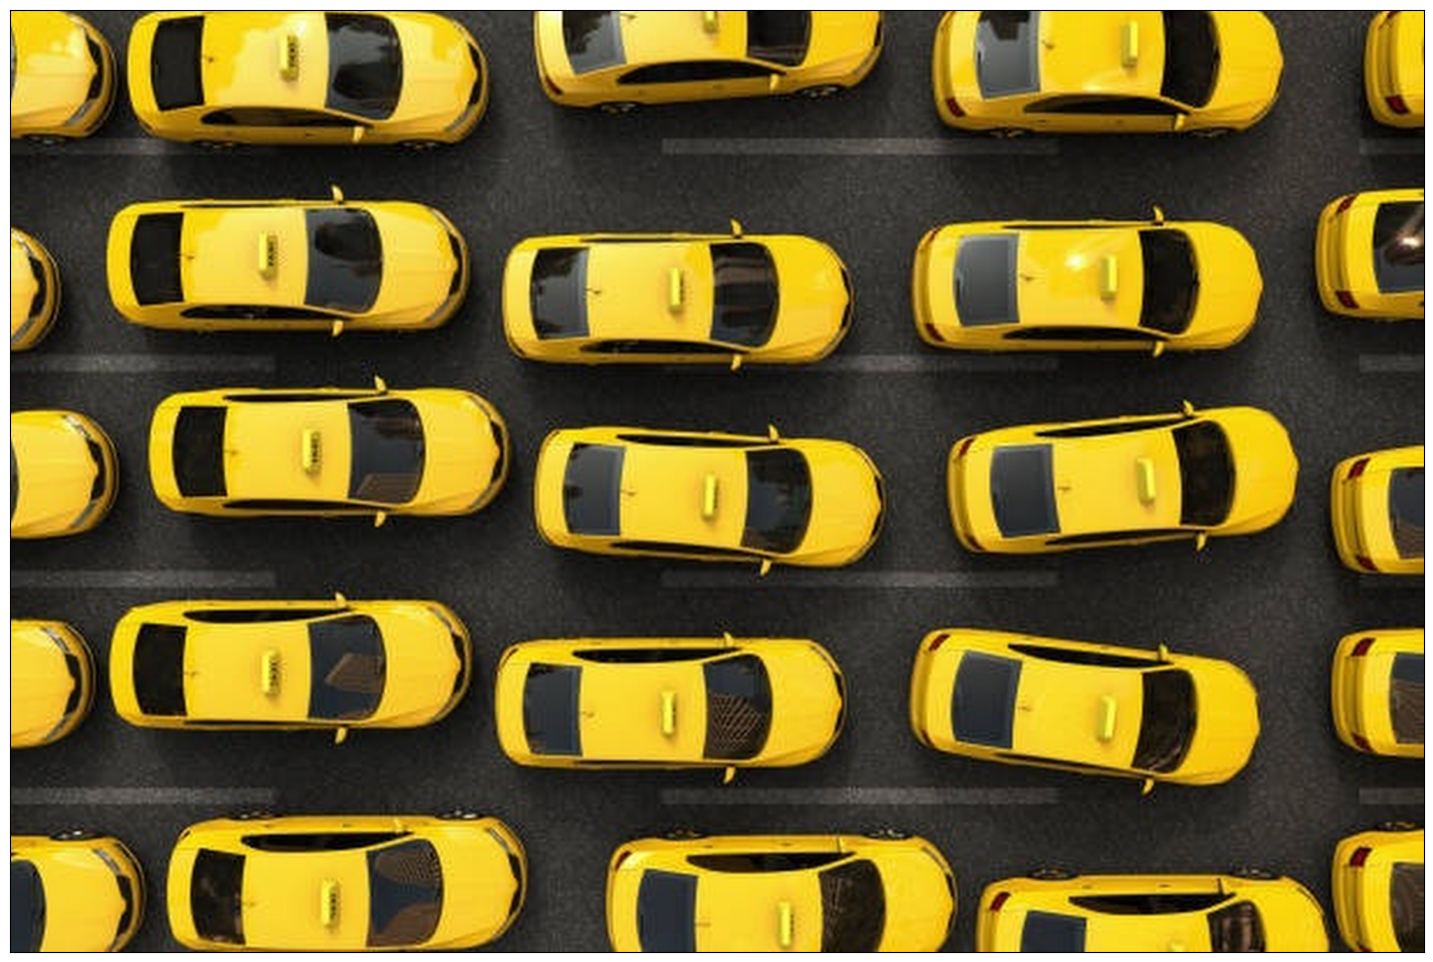

In [5]:
# display input image data
display_image(
    image_data = input_image_data, # pass the image data
    conversion = cv.COLOR_BGR2RGB # convert BGR data to RGB data
)

## Detecting image contours
OpenCV can detect contours in the images, a basic task in computer vision.

A good choice is the Canny algorithm which selects pixels that have a color variation gradient between a lower and upper threshold.

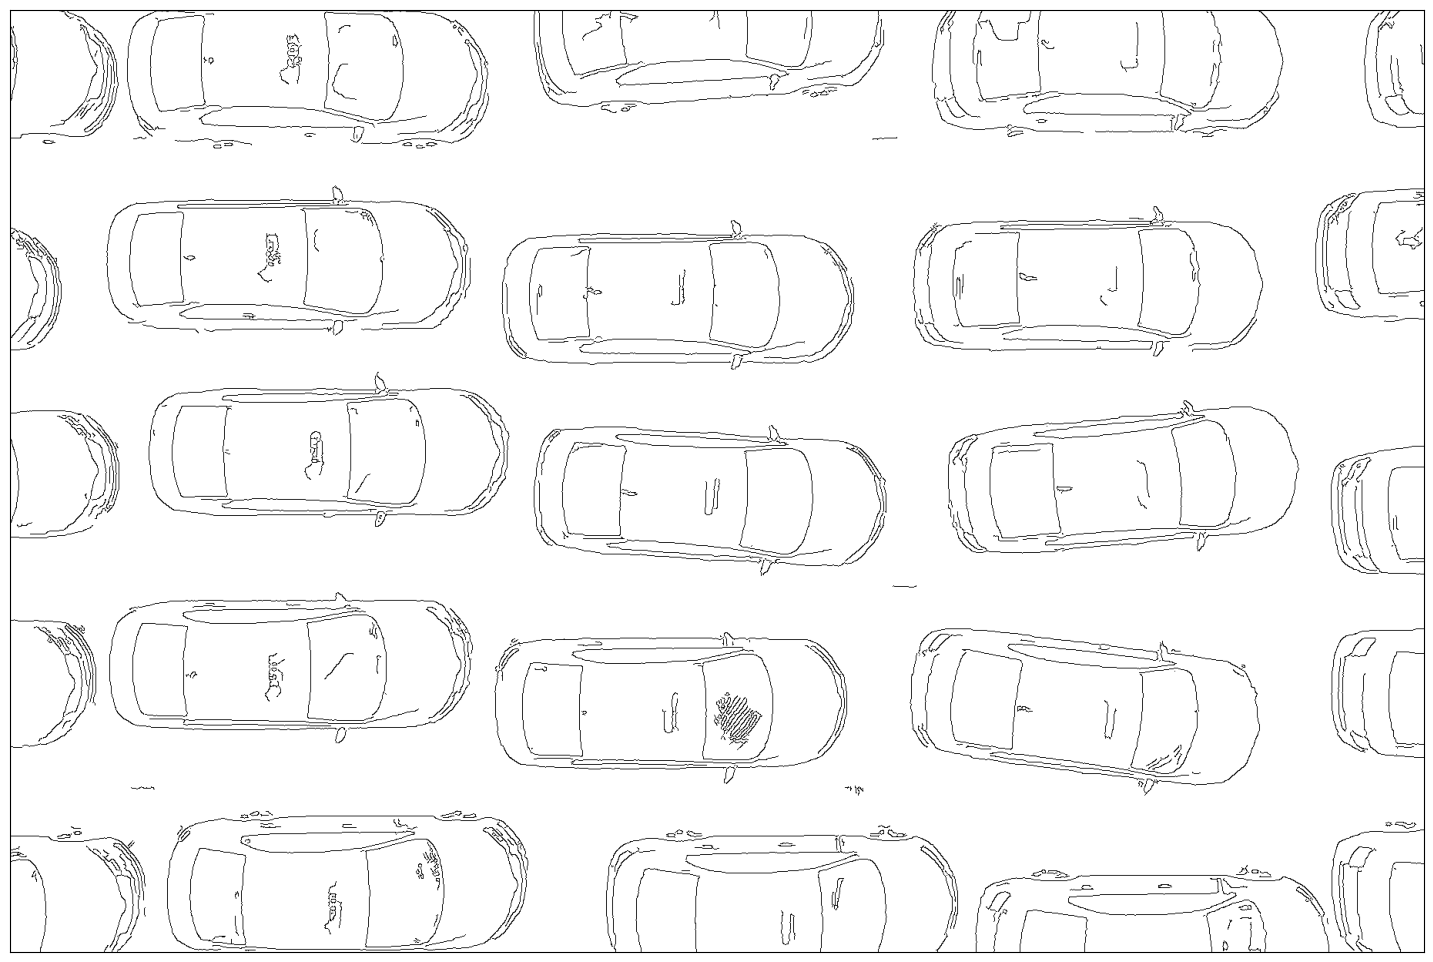

In [6]:
# transform the image to grayscale color
gray_scale_image_data = cv.cvtColor(
    src = input_image_data,
    code = cv.COLOR_BGR2GRAY
)

# we will detect image edges using Canny algorithm
# using automated threshold values
mean_pixel_value = np.mean(input_image_data)
lower_threshold = 1.0 * mean_pixel_value
higher_threshold = 2.0 * mean_pixel_value

edged_image_data = cv.Canny(
    image = gray_scale_image_data, # the image data
    threshold1 = lower_threshold, # lower threshold gradient
    threshold2 = higher_threshold # higher threshold gradient
)

# switch pixel colors
edged_image_data = 255 - edged_image_data

# display image data
display_image(
    image_data = edged_image_data, # pass the image data
    conversion = cv.COLOR_BGR2RGB # convert BGR data to RGB data
)

## Performing image segmentation
OpenCV also performs image segmentation which is essential for advanced operation such as object detection or semantic annotation.

The watershed algorithm is a standard algorithm for extracting various regions (segments) of an image. 

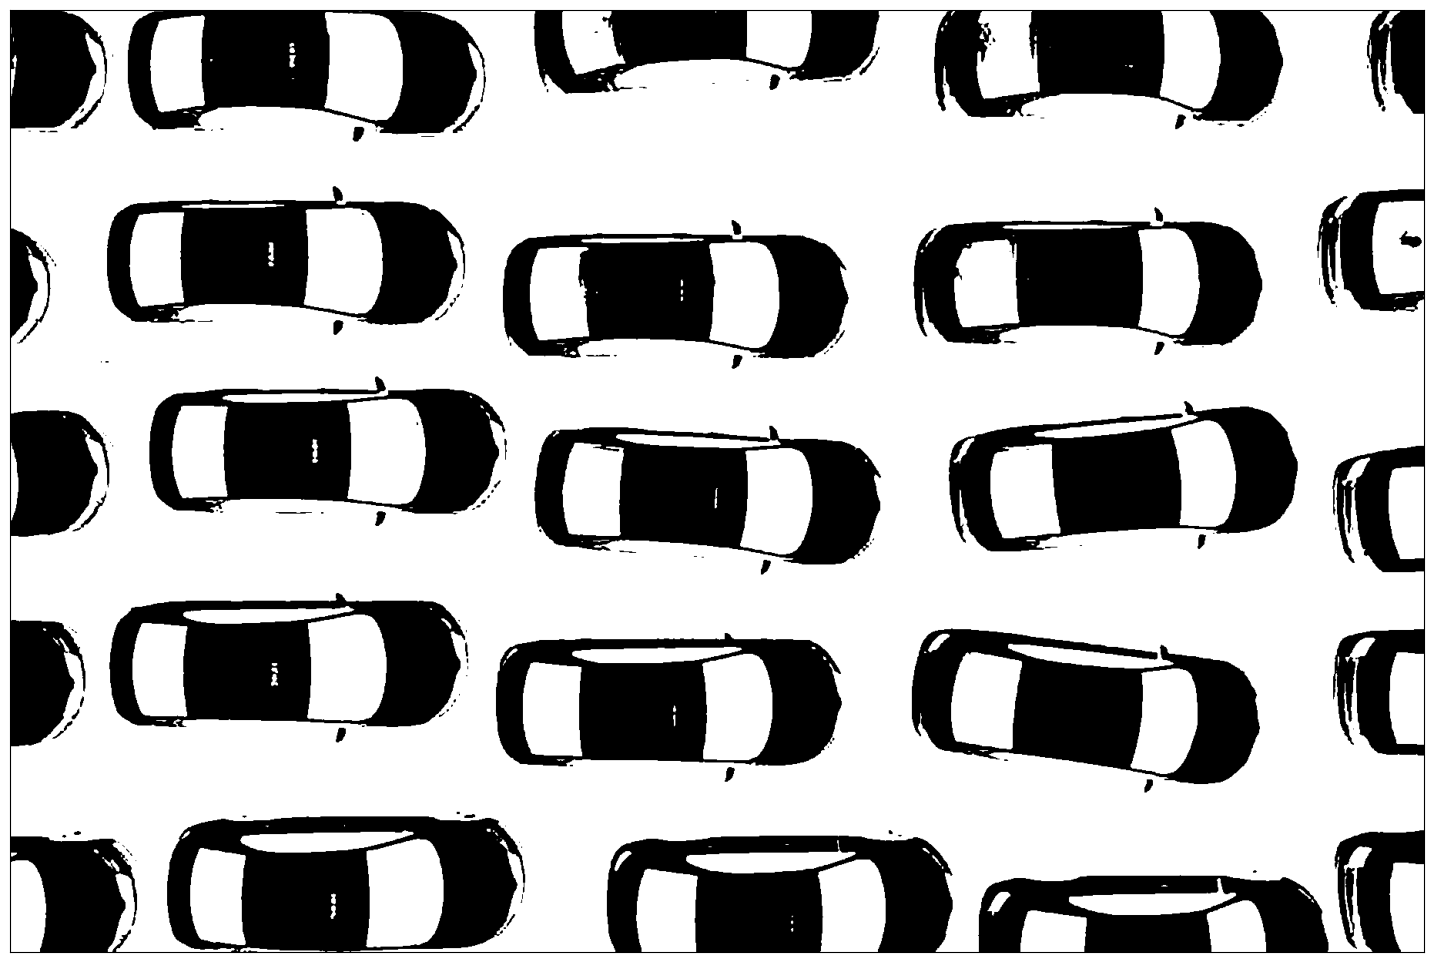

In [7]:
# we will compute a image threshold using Otsu method
_, threshold_image = cv.threshold(
    src = gray_scale_image_data,
    thresh = 0,  # threshold value
    maxval = 255,  # maximal value allowed
    type=cv.THRESH_BINARY_INV + cv.THRESH_OTSU # Otsu image threshold method will be used, colors will be inverted
)

# display image data
display_image(
    image_data = threshold_image,  # pass the image data
    cmap="gray"
)

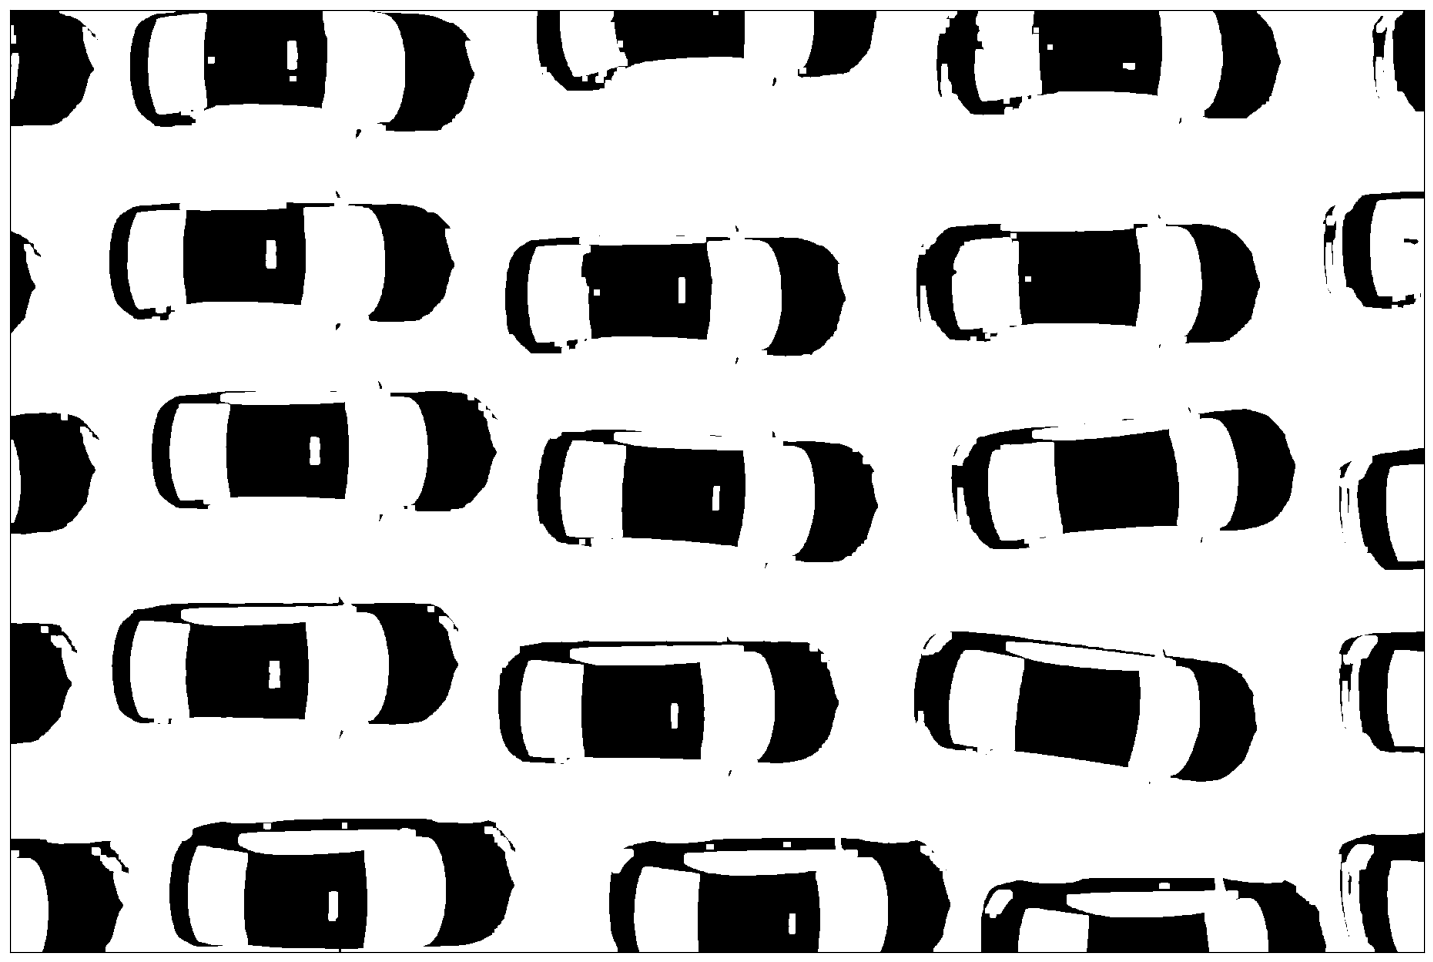

In [8]:
# we will use image dilation to ensure 
# background is detected with maximum chance
dilation_kernel = np.ones((3, 3), np.uint8)
background_enhanced_image_data = cv.dilate(
    src = threshold_image,
    kernel = dilation_kernel, 
    iterations = 3
)

# display image data
display_image(
    image_data = background_enhanced_image_data, # pass the image data
    cmap = "gray"
)  

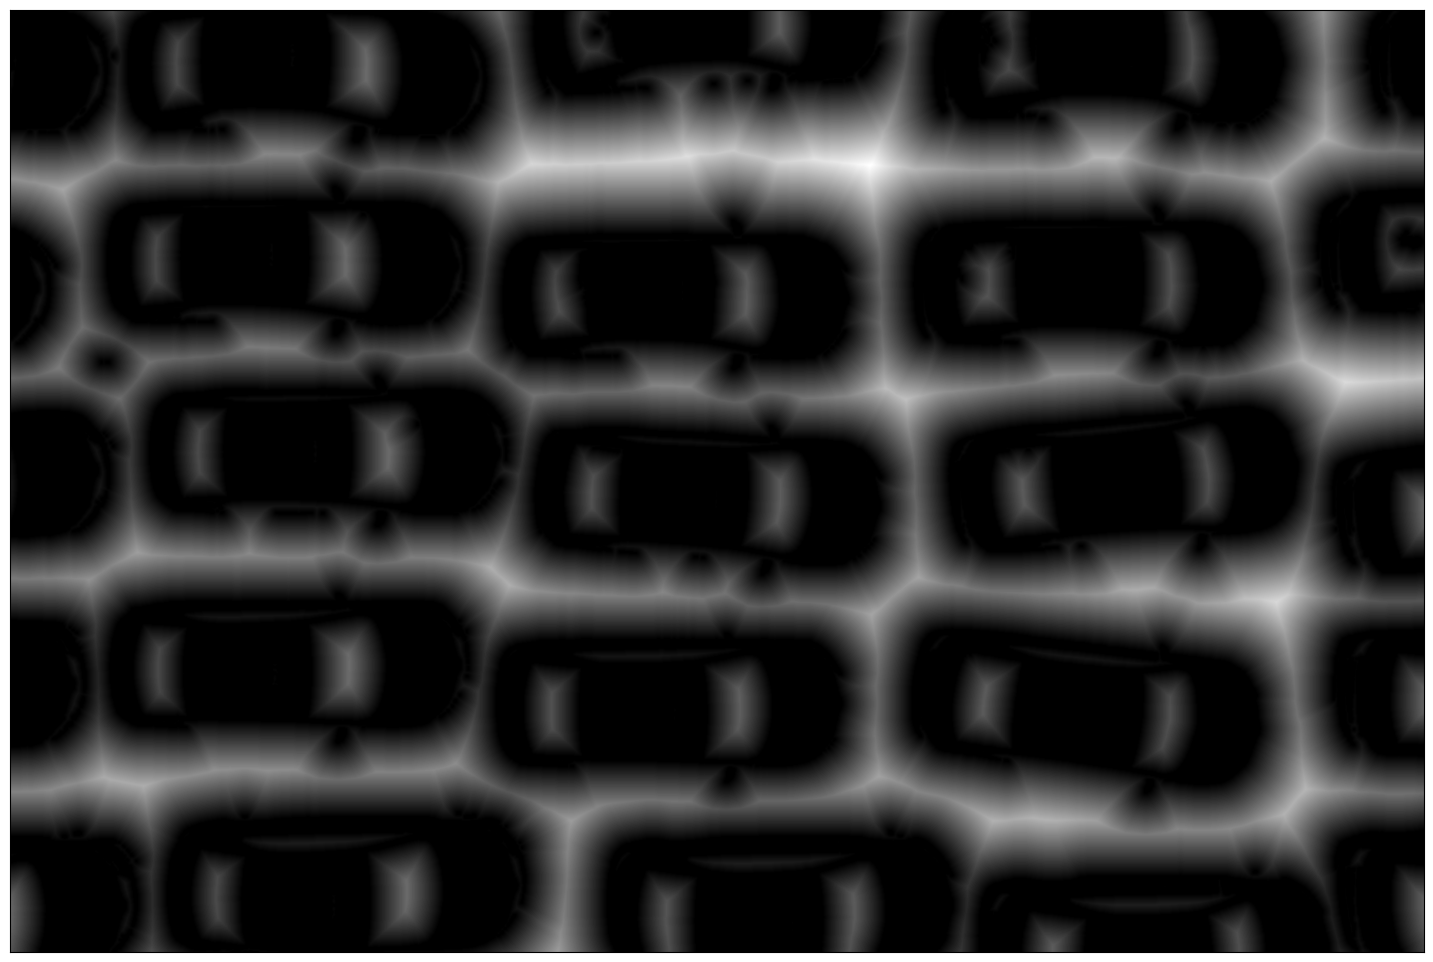

In [9]:
# erode image before distance transformation
erosion_kernel = np.ones((2, 2), np.uint8)
eroded_image_data = cv.erode(
    src = threshold_image,
    kernel = erosion_kernel, 
    iterations = 1
)

# perform image distance transformation
distance_transform_image_data = cv.distanceTransform(
    eroded_image_data, 
    cv.DIST_L2,
    5
)

# display image data
display_image(
    image_data = distance_transform_image_data, # pass the image data
    cmap = "gray"
)  

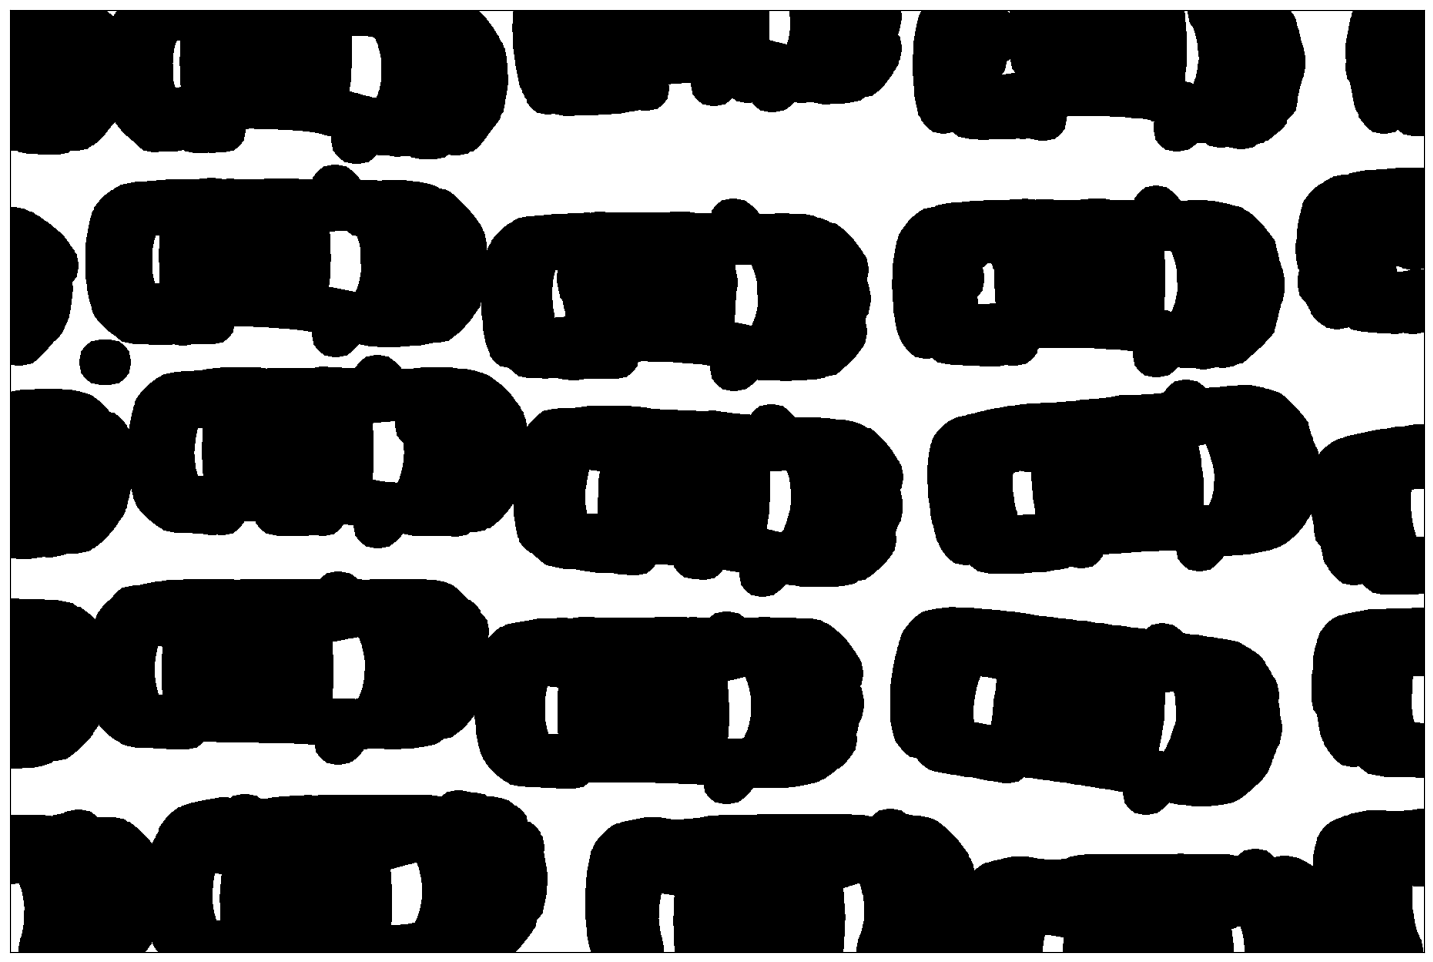

In [10]:
_, foreground_enhanced_image_data = cv.threshold(
    distance_transform_image_data,
    0.25 * distance_transform_image_data.max(),
    255,
    0
)
foreground_enhanced_image_data = np.uint8(foreground_enhanced_image_data)

# display image data
display_image(
    image_data = foreground_enhanced_image_data, # pass the image data
    cmap = "gray"
)  

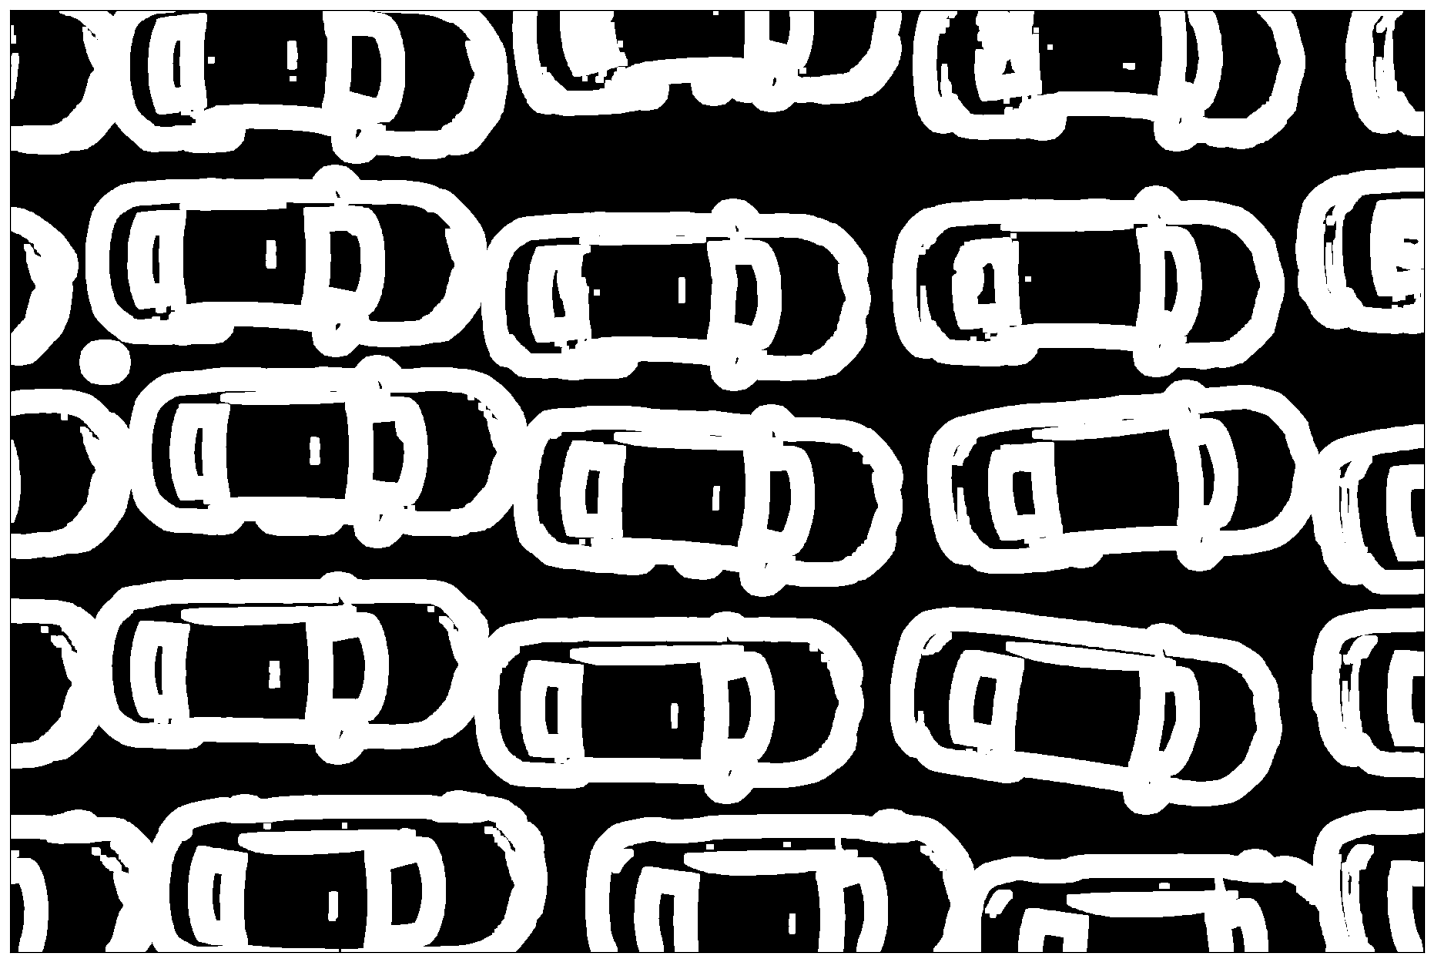

In [11]:
# determine undetermined background and foreground image regions
# this means they belong to both background and foreground
undetermined_image_data = cv.subtract(
    background_enhanced_image_data, # will subtract from background image data 
    foreground_enhanced_image_data # will subtract the foreground image data
)

# display image data
display_image(
    image_data = undetermined_image_data, # pass the image data
    cmap = "gray"
)  

In [12]:
_, markers = cv.connectedComponents(foreground_enhanced_image_data)
markers = markers + 1
markers[undetermined_image_data == 255] = 0

In [13]:
# generate watershed markers
# they act as area labels
watershed_markers = cv.watershed(
    input_image_data,
    markers
)

# ensure that the -1 (undetermined) markers get the 0 label
watershed_markers = watershed_markers + 1

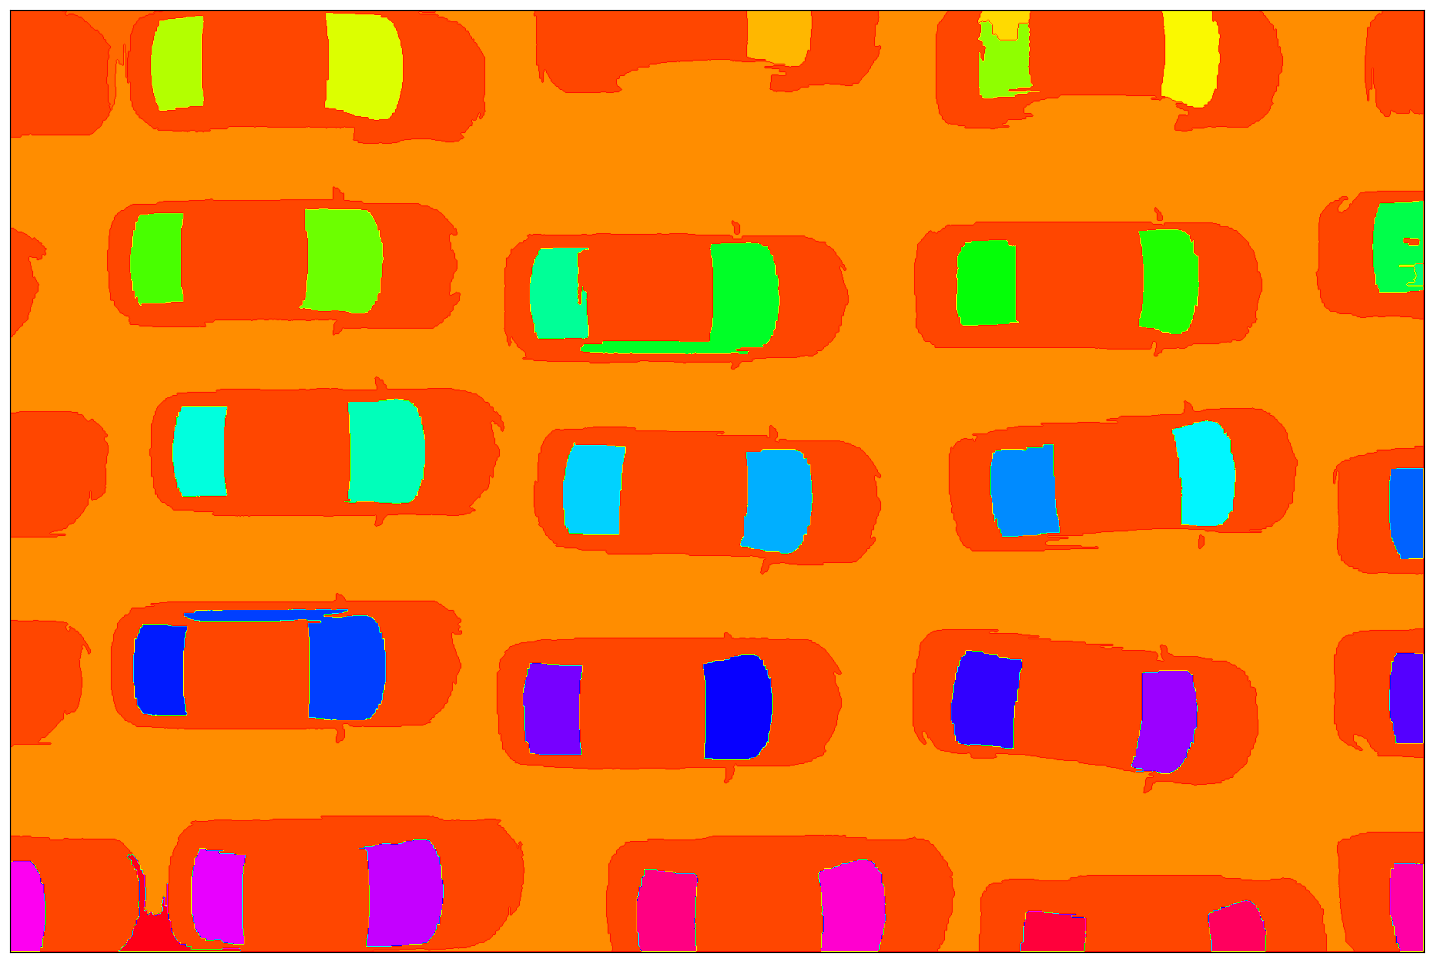

In [14]:
# display image data
display_image(
    image_data = watershed_markers, # pass the image data
    cmap = "hsv"
)  